In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
carinsurance_train = pd.read_csv('C:\\Users\om sai\\Downloads\\logistics regression\\Case 1\\carInsurance_train.csv')
carinsurance_test = pd.read_csv('C:\\Users\om sai\\Downloads\\logistics regression\\Case 1\\carInsurance_test.csv')

In [3]:
carinsurance_train.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [4]:
carinsurance_train.tail()

Id  Age           Job   Marital  Education  Default  Balance  \
3995  3996   28    technician    single   tertiary        0        0   
3996  3997   49        admin.  divorced  secondary        0      124   
3997  3998   27        admin.    single  secondary        0     -400   
3998  3999   36  entrepreneur    single   tertiary        0      658   
3999  4000   45      services   married    primary        0      137   

      HHInsurance  CarLoan Communication  LastContactDay LastContactMonth  \
3995            1        0      cellular              25              may   
3996            1        1      cellular              29              jul   
3997            0        1      cellular               8              jul   
3998            1        0      cellular              29              jan   
3999            1        0           NaN               9              may   

      NoOfContacts  DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  \
3995             1          40             2  failure  17:46:28  17:50:57   
3996            19          -1             0      NaN  14:49:16  14:51:21   
3997             1          -1             0      NaN  12:19:03  12:23:53   
3998             1         227             3  failure  11:27:35  11:29:14   
3999             2          -1             0      NaN  13:31:48  13:36:22   

      CarInsurance  
3995             1  
3996             0  
3997             0  
3998             0  
3999             0

In [5]:
print(carinsurance_train.nunique())

Id                  4000
Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
Outcome                3
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64


In [6]:
carinsurance_train.shape

(4000, 19)

In [7]:
print(carinsurance_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB
None


In [8]:
carinsurance_train.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [9]:
carinsurance_train.describe()

Id          Age      Default       Balance  HHInsurance  \
count  4000.000000  4000.000000  4000.000000   4000.000000   4000.00000   
mean   2000.500000    41.214750     0.014500   1532.937250      0.49275   
std    1154.844867    11.550194     0.119555   3511.452489      0.50001   
min       1.000000    18.000000     0.000000  -3058.000000      0.00000   
25%    1000.750000    32.000000     0.000000    111.000000      0.00000   
50%    2000.500000    39.000000     0.000000    551.500000      0.00000   
75%    3000.250000    49.000000     0.000000   1619.000000      1.00000   
max    4000.000000    95.000000     1.000000  98417.000000      1.00000   

           CarLoan  LastContactDay  NoOfContacts   DaysPassed  PrevAttempts  \
count  4000.000000     4000.000000   4000.000000  4000.000000   4000.000000   
mean      0.133000       15.721250      2.607250    48.706500      0.717500   
std       0.339617        8.425307      3.064204   106.685385      2.078647   
min       0.000000        1.000000      1.000000    -1.000000      0.000000   
25%       0.000000        8.000000      1.000000    -1.000000      0.000000   
50%       0.000000       16.000000      2.000000    -1.000000      0.000000   
75%       0.000000       22.000000      3.000000    -1.000000      0.000000   
max       1.000000       31.000000     43.000000   854.000000     58.000000   

       CarInsurance  
count   4000.000000  
mean       0.401000  
std        0.490162  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [10]:
carinsurance_train.describe(include='object')

Job  Marital  Education Communication LastContactMonth  \
count         3981     4000       3831          3098             4000   
unique          11        3          3             2               12   
top     management  married  secondary      cellular              may   
freq           893     2304       1988          2831             1049   

        Outcome CallStart   CallEnd  
count       958      4000      4000  
unique        3      3777      3764  
top     failure  17:11:04  10:52:24  
freq        437         3         3

In [11]:
carinsurance_train.Outcome.mode().count()

1

In [12]:
carinsurance_train.Job.mode()

0    management
dtype: object

In [13]:
import pandas_profiling as pp


In [14]:
pp.ProfileReport(carinsurance_train)

In [15]:
import seaborn as sns

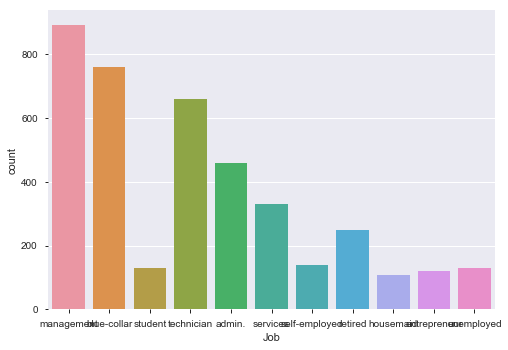

In [16]:
sns.countplot(data= carinsurance_train ,x='Job')

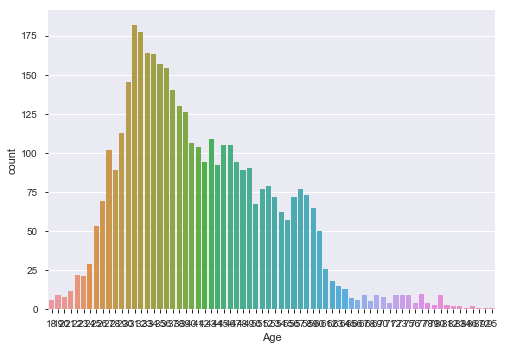

In [17]:
sns.countplot(data= carinsurance_train ,x='Age')

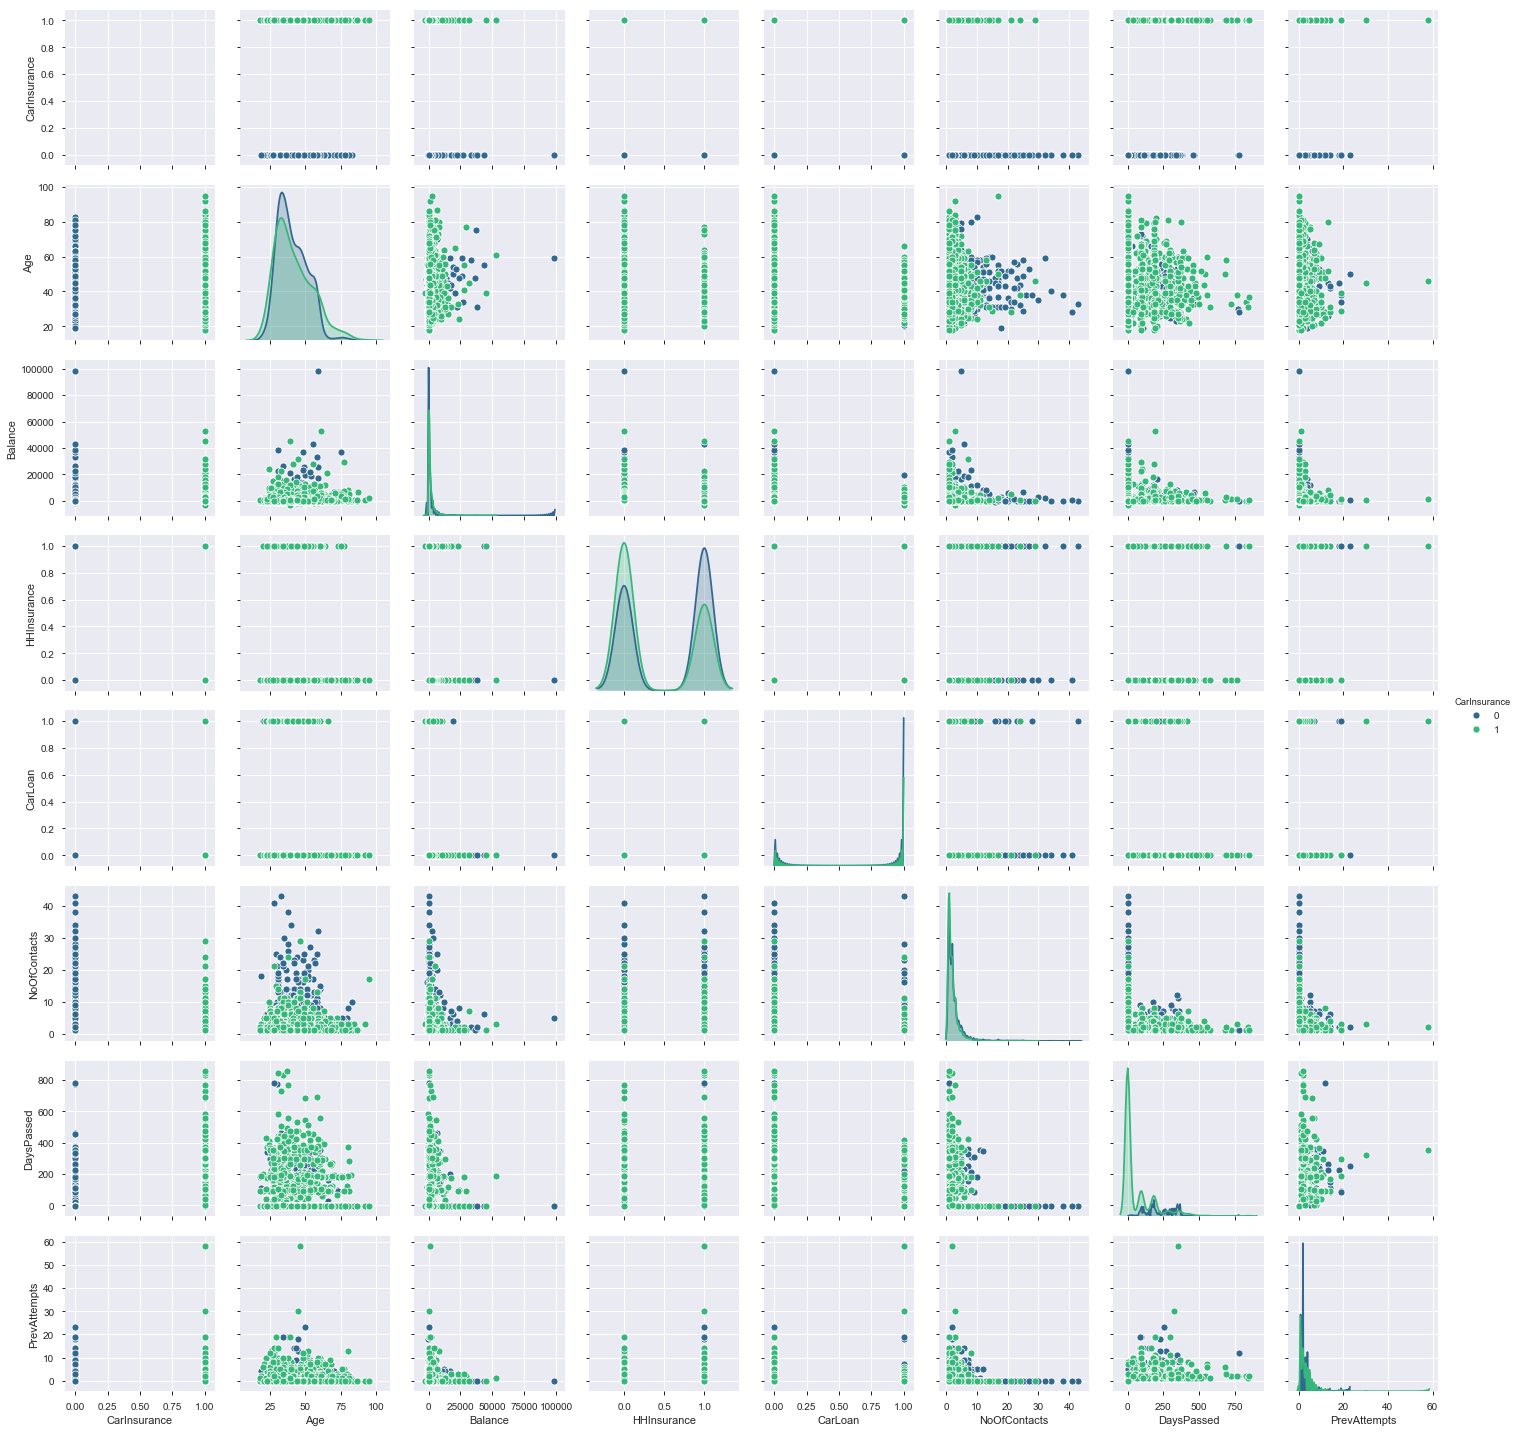

In [18]:
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(carinsurance_train[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

NameError: name 'Facet' is not defined

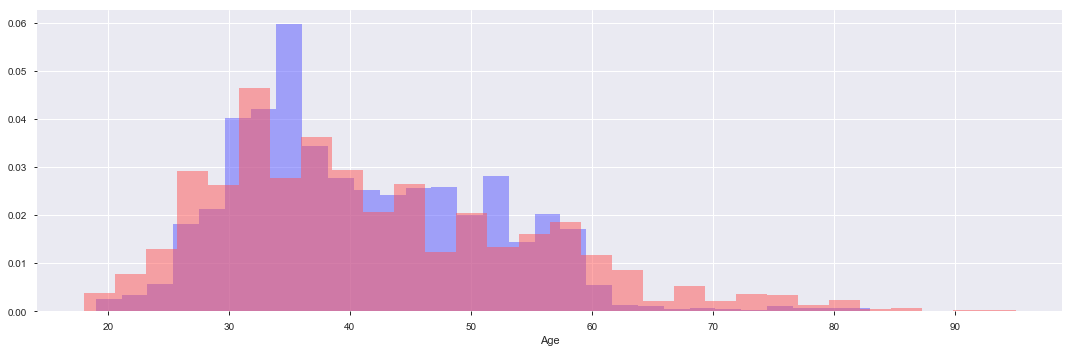

In [19]:
facet = sns.FacetGrid(carinsurance_train,hue='CarInsurance',size=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,normed =True)
Facet.set(xlim=(0,carinsurance_train.Age.max()+10))
facet.add_legend()

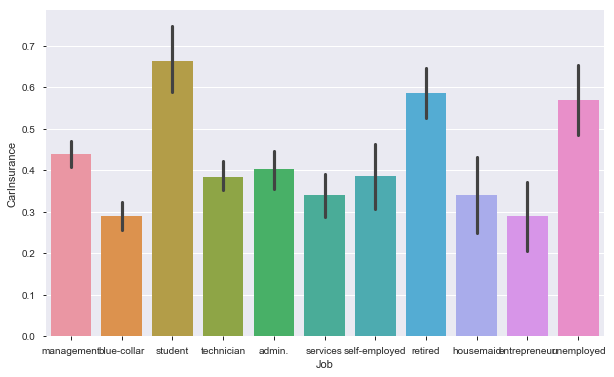

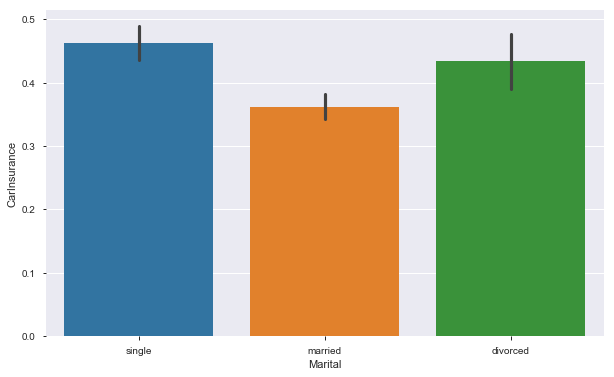

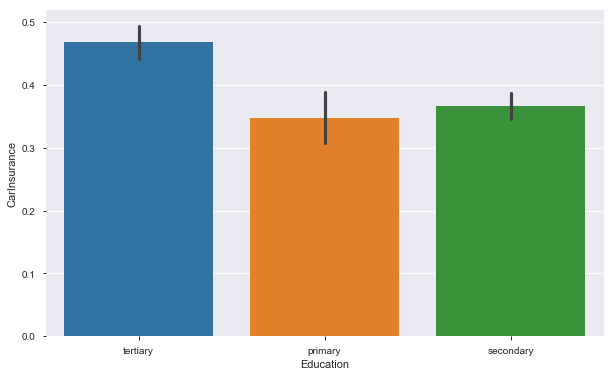

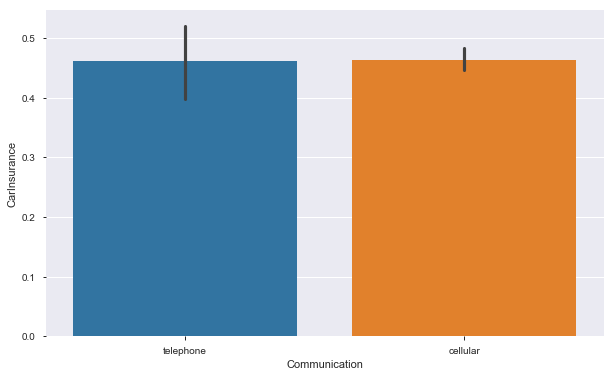

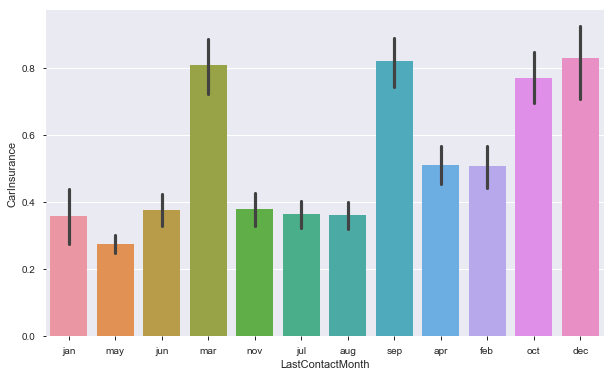

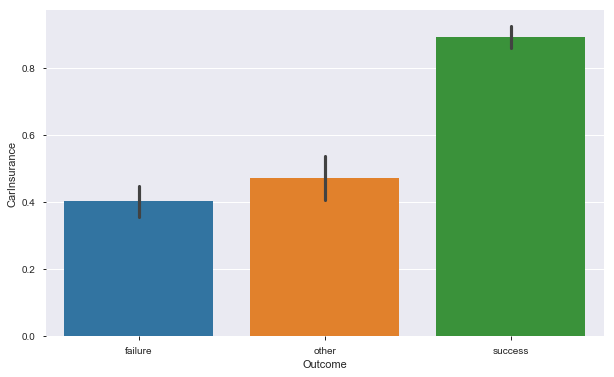

In [20]:
categorical_col =carinsurance_train.select_dtypes(include=['object']).columns
categorical_col_plot=categorical_col[(categorical_col!='CallStart')& (categorical_col!='CallEnd')]
for feature in categorical_col_plot :
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance',data=carinsurance_train)

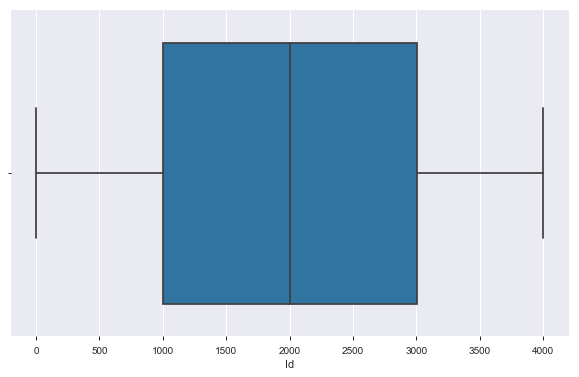

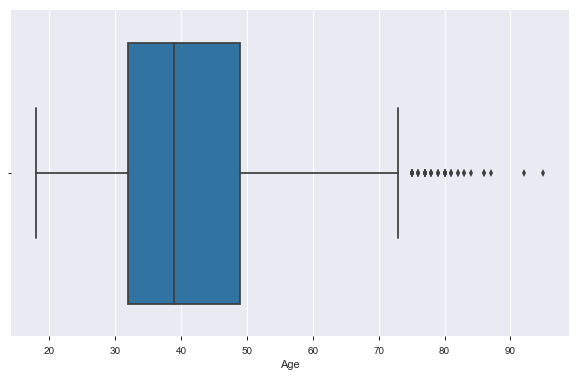

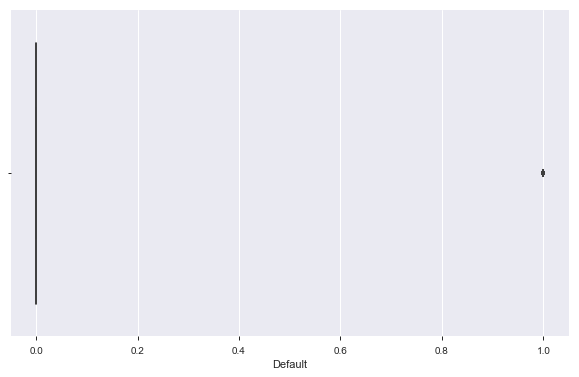

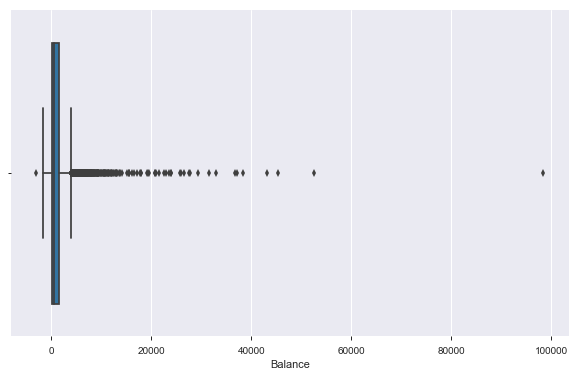

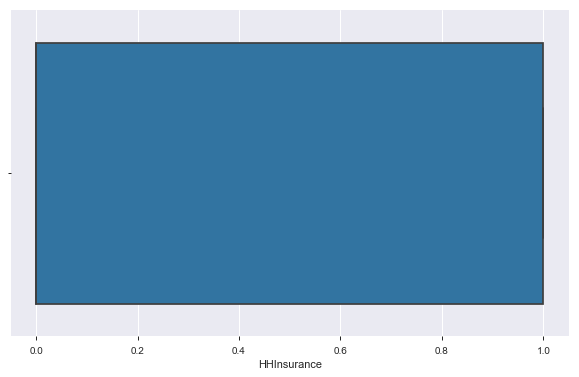

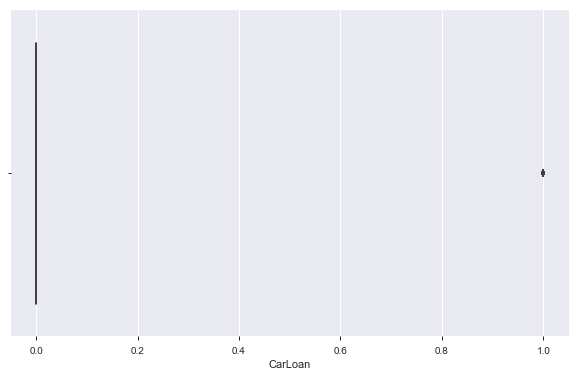

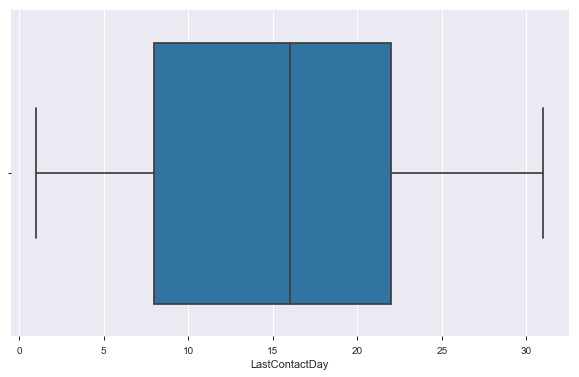

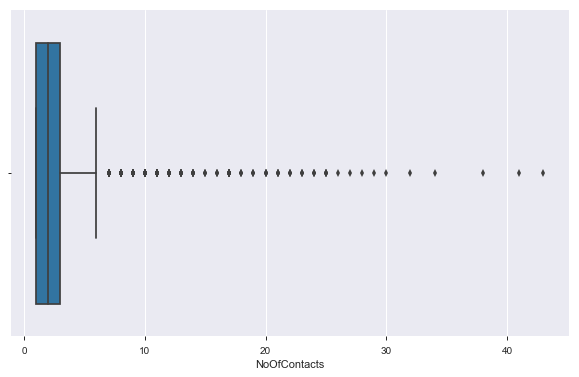

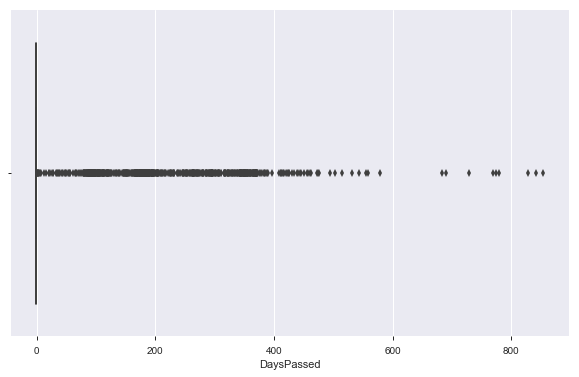

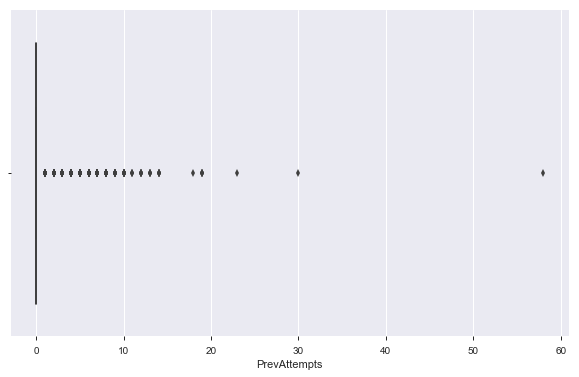

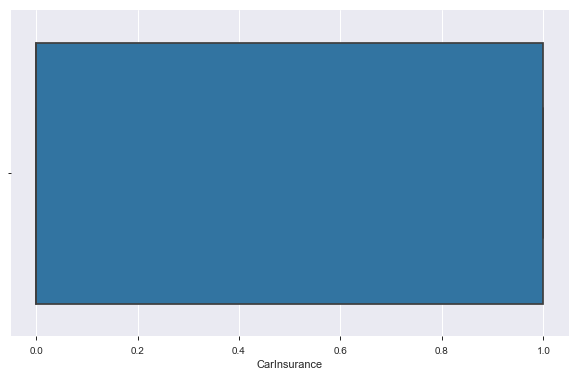

In [21]:
num_col =carinsurance_train.select_dtypes(include=['int64'])
for feature in num_col :
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature,data=carinsurance_train)

In [41]:
total_data =pd.concat([carinsurance_train,carinsurance_test],keys=('train','test'))

In [42]:
total_data.drop(['CarInsurance','Id'],axis=1,inplace=True)

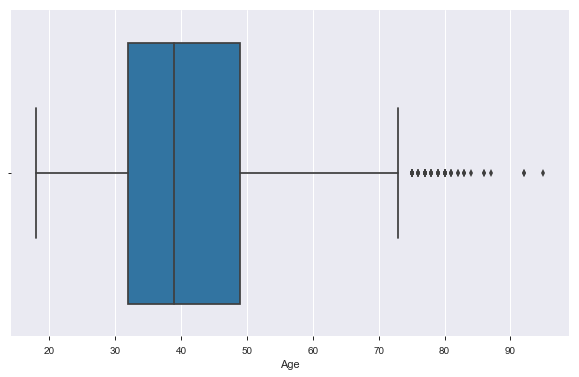

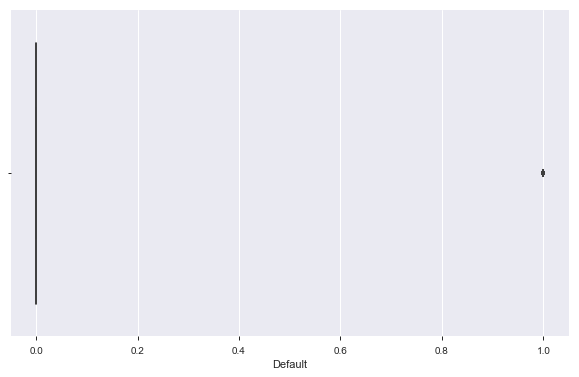

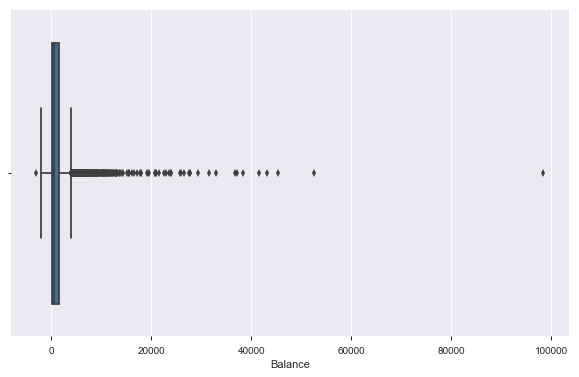

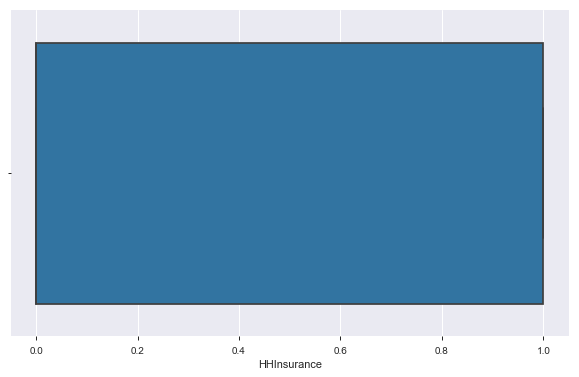

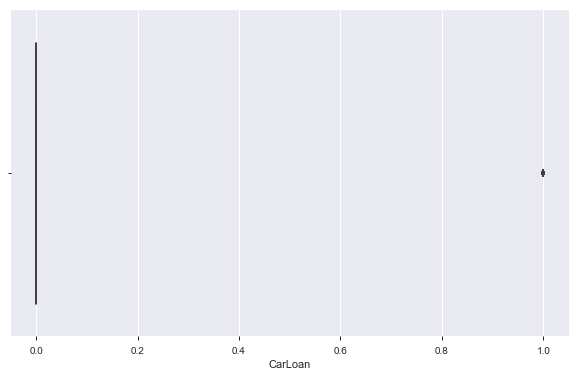

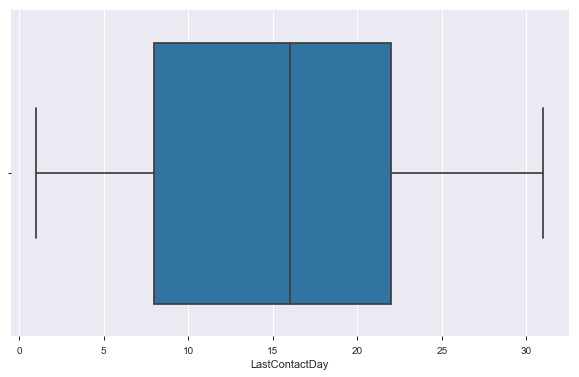

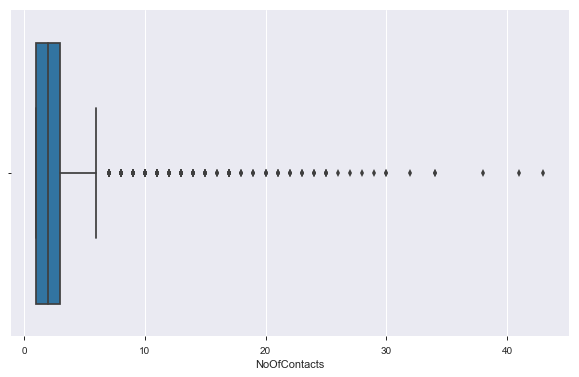

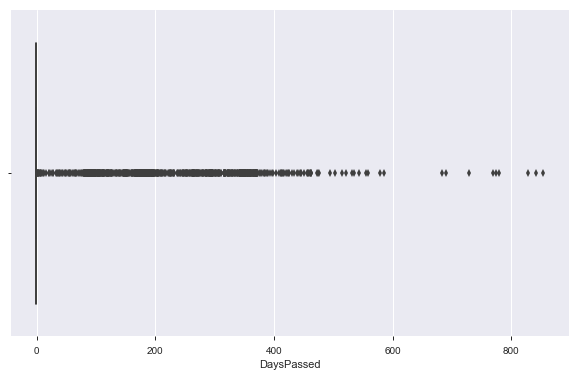

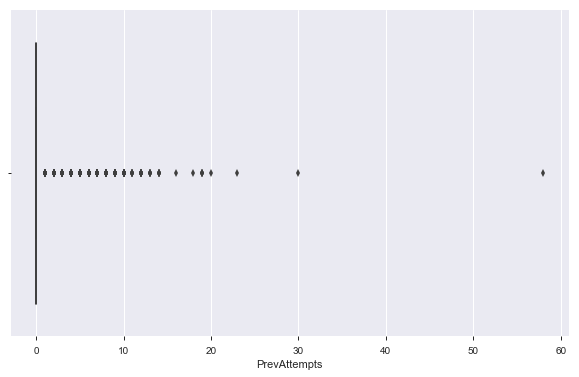

In [43]:
num_col =total_data.select_dtypes(include=['int64'])
for feature in num_col :
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature,data=total_data)

In [44]:
total_data.nunique()

Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2496
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           362
PrevAttempts          22
Outcome                3
CallStart           4640
CallEnd             4630
dtype: int64

In [46]:
total_data.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
dtype: int64

In [47]:
total_data.Communication=total_data.Communication.fillna('None')

In [48]:
total_data.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
dtype: int64

In [54]:
total_data['Education'].value_counts()
edu_mode=[]
job_types = total_data.Job.value_counts().index
print(job_types)
total_data['Job'].value_counts()

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')


management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [58]:
for job in job_types:
    mode = total_data[total_data.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=total_data.Job.value_counts().index)

edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object